In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import tifffile
import matplotlib.pyplot as plt

In [2]:
def resize_im(im_name, scale_percent):
    image_path = os.path.join(input_dir, im_name+'.tiff')
    im_read = tifffile.imread(image_path)
    width = int(im_read.shape[1] * scale_percent / 100)
    height = int(im_read.shape[0] * scale_percent / 100)
    dim = (width, height)
    print('File name: {}, original size: {}, resized to: {}'.format(im_name, 
                                                                    (im_read.shape[0], im_read.shape[1]), 
                                                                    (width, height)))
    resized = cv2.resize(im_read, dim, interpolation=cv2.INTER_AREA)
    image_path = os.path.join(output_dir, ('r_' + im_name+'.tiff'))
    tifffile.imwrite(image_path, resized)

In [3]:
def rle2mask(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.array(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

In [4]:
def resize_mask(im_name, scale_percent):
    im_read = tifffile.imread(os.path.join(input_dir, im_name+'.tiff'))
    mask_rle = df[df["id"] == im_name]["predicted"].values[0]
    mask = rle2mask(df[df["id"] == im_name]["predicted"].values[0], (im_read.shape[1], im_read.shape[0]))*255
    width = int(im_read.shape[1] * scale_percent / 100)
    height = int(im_read.shape[0] * scale_percent / 100)
    dim = (width, height)
    print('File name: {}, original size: {}, resized to: {}'.format(im_name, 
                                                                (im_read.shape[0], im_read.shape[1]), 
                                                                (width, height)))
    resized = cv2.resize(mask, dim, interpolation=cv2.INTER_AREA)
    image_path = os.path.join(output_dir, ('r_' + im_name+'_m.tiff'))
    tifffile.imwrite(image_path, resized)

In [5]:
os.makedirs('../output')
input_dir = '../input/hubmap-kidney-segmentation/test'
output_dir = '../output'
image_list = ['afa5e8098', 'b2dc8411c', 'b9a3865fc']

In [6]:
df = pd.read_csv('../input/submission-smp-unet/submission.csv')
print(df)

          id                                          predicted
0  b9a3865fc  61052808 21 61084094 42 61115382 52 61146675 5...
1  b2dc8411c  56543684 4 56558515 19 56573342 6 56573354 27 ...
2  26dc41664  219318455 2 219356615 2 219394774 3 219432934 ...
3  c68fe75ea  22196120 163 22222960 163 22249800 164 2227663...
4  afa5e8098  65985257 19 66022054 27 66058749 33 66058852 3...


In [7]:
for img in image_list:
    resize_im(img, 5)

File name: afa5e8098, original size: (36800, 43780), resized to: (2189, 1840)
File name: b2dc8411c, original size: (14844, 31262), resized to: (1563, 742)
File name: b9a3865fc, original size: (31295, 40429), resized to: (2021, 1564)


In [8]:
for img in image_list:
    resize_mask(img, 5)

File name: afa5e8098, original size: (36800, 43780), resized to: (2189, 1840)
File name: b2dc8411c, original size: (14844, 31262), resized to: (1563, 742)
File name: b9a3865fc, original size: (31295, 40429), resized to: (2021, 1564)


In [9]:
def show_image(image_id):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 32))
    image_path = os.path.join(output_dir, 'r_{}.tiff'.format(image_id))
    mask_path = os.path.join(output_dir, 'r_{}_m.tiff'.format(image_id))
    image = tifffile.imread(image_path)
    mask = tifffile.imread(mask_path)
    if len(mask.shape) == 2:
        hybr = image[:, :, 0] + mask[:, :]/2
    else:
        hybr = image[:, :, 0] + mask[:, :, 0]/2
    ax[0].imshow(image)
    ax[0].axis('off')
    ax[0].set_title('Real Image')
    ax[1].imshow(hybr)
    ax[1].axis('off')
    ax[1].set_title('Masks')
    plt.show()

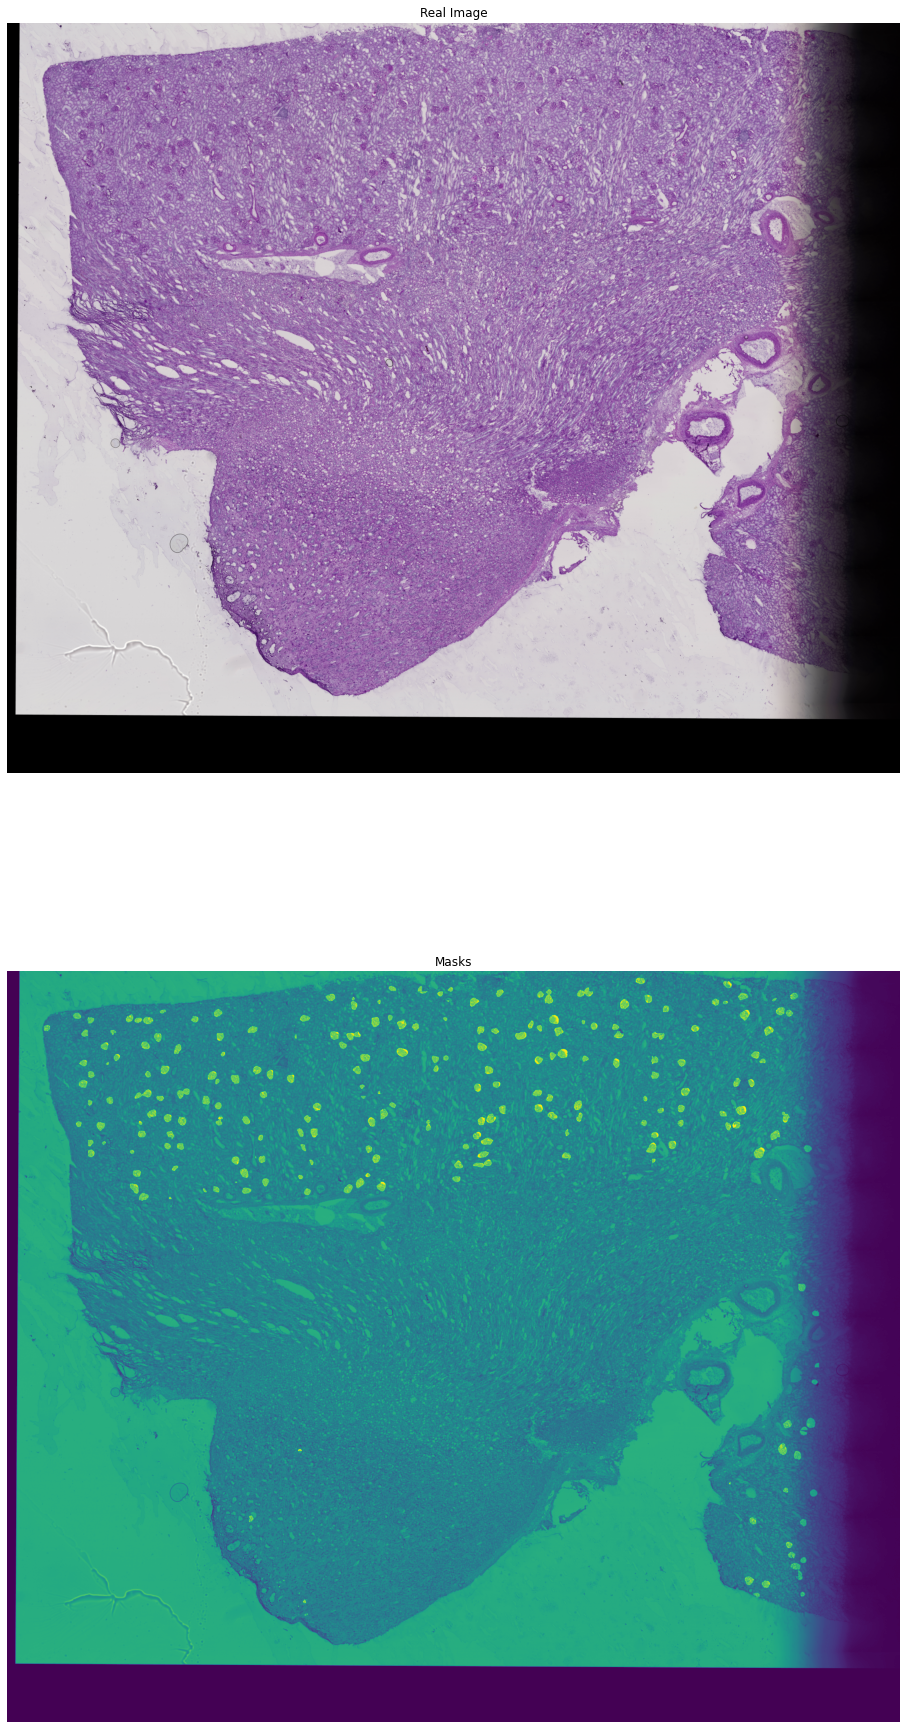

In [10]:
%matplotlib inline
show_image(image_list[0])

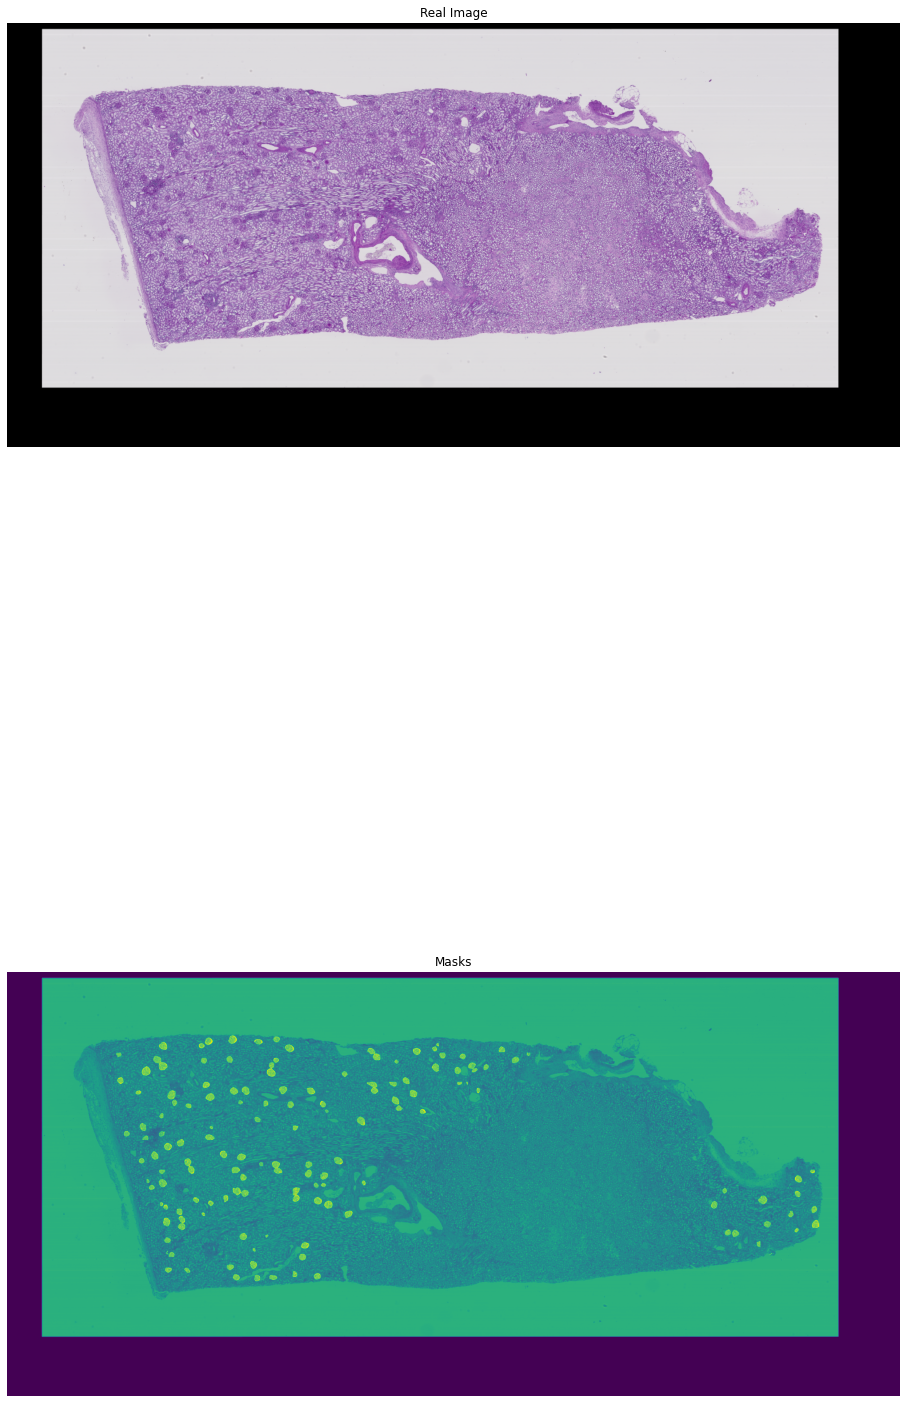

In [11]:
%matplotlib inline
show_image(image_list[1])

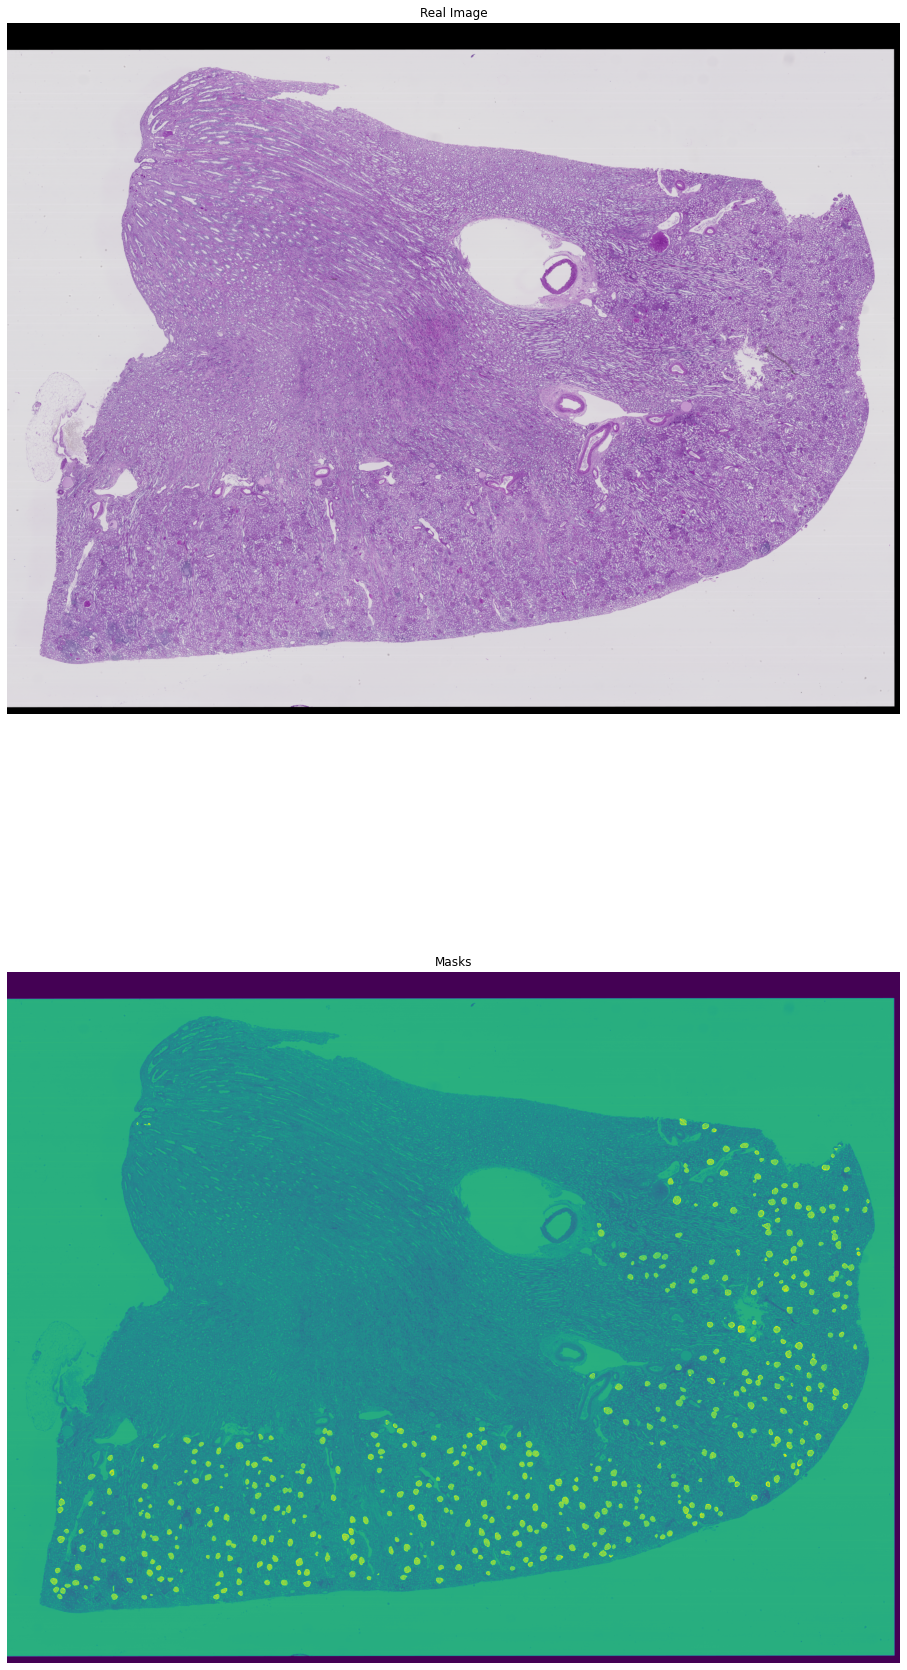

In [12]:
%matplotlib inline
show_image(image_list[2])